# A quick example on how to deal with the data

This notebook serves as a little guidance on how to deal with the reduced brite data. Please look through this carefully, and take note of the comments.

# Features Todo
- ~~point to point scatter~~
- T, 1/T
- ~~Number of datapoints~~
- Time sampling
- ~~Noise~~

In [1]:
#this should always be your starting point on any notebook. Loads the data types
from common import *
%matplotlib inline

/Users/marco/.brite


/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# using the load function, you can load a certain field from your hard drive. It returns a list
# of possible stars, which you can use
stars = load(7)
stars

[HD63744,
 HD63922,
 HD64440,
 HD64740,
 HD64760,
 HD65575,
 HD65818,
 HD66811,
 HD68273,
 HD68553,
 HD69142,
 HD71129,
 HD72127,
 HD73634,
 HD74006,
 HD74180,
 HD74195,
 HD74375,
 HD74560,
 HD74575,
 HD74772,
 HD74956,
 HD75063,
 HD75311,
 HD75821,
 HD76728,
 HD77002,
 HD78004,
 HD78647,
 HD79351,
 HD79940,
 HD80230,
 HD80404,
 HD81188,
 HD82434,
 HD82668,
 HD83183,
 HD83446,
 HD86440]

In [4]:
#pick one of the stars you are interested in
star = [i for i in stars if i.name == "HD71129"][0]

In [5]:
#most stars will have a number of subfolders, with multiple reductions in them. Pick the one
#you like
star.results

['all']

In [6]:
#Feed the result you like into the get_data function which loads the data in the Data object
data = star.get_data(star.results[0])

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 16270 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 716 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Text(0, 0.5, 'Amplitude [mag]')

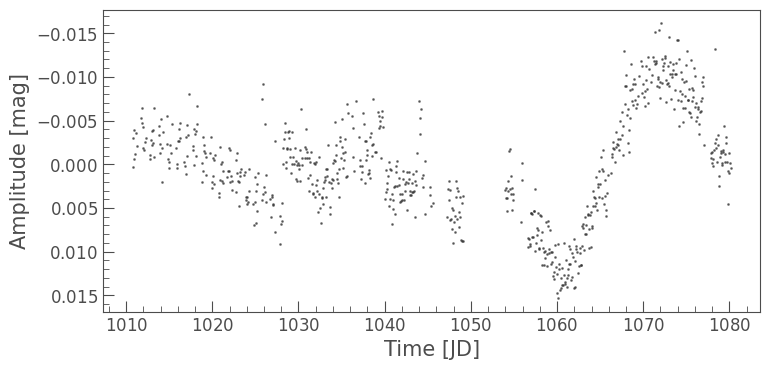

In [10]:
obj = data.get_averaged_lightcurve()
ax = obj.scatter( alpha=0.6)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel("Amplitude [mag]")

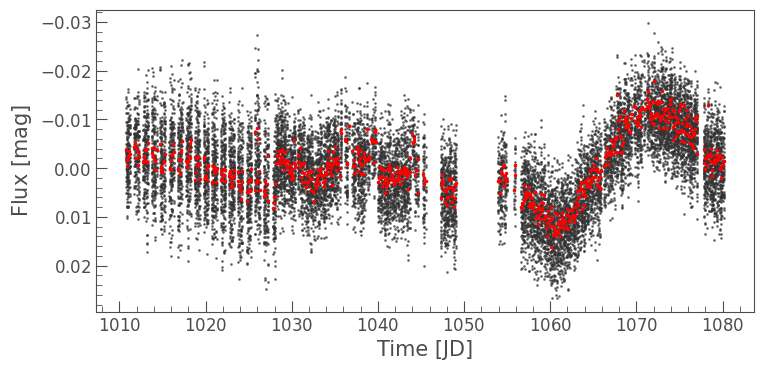

In [8]:
#Now you can plot the data :)
data.scatter()

In [24]:
star.simbad["SP_TYPE"].value.data[0]

'K3:III'

In [ ]:
np.sqrt(np.sum(ave_data.flux.value**2)/len(ave_data.flux))

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{mag}$]'>

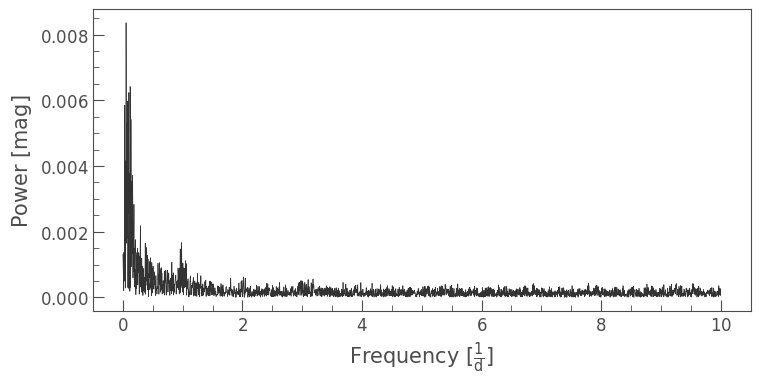

In [26]:
#You can also convert any given lightcurve into a periodogram
data.to_periodogram().plot()

In [10]:
#You can also easily find out some basic information about any given periodogram
# by using the show_properties function
data.to_periodogram().show_properties()



lightkurve.Periodogram properties:
      Attribute                   Description            Units
---------------------- --------------------------------- -----
                nterms                                 1      
          default_view                         frequency      
             ls_method                              fast      
frequency_at_max_power                            1.3834 1 / d
             max_power                            0.0803   mag
               nyquist                         2824.8588 1 / d
   period_at_max_power                            0.7228     d
             frequency                     array (8096,) 1 / d
                period                     array (8096,)     d
                 power                     array (8096,)   mag
                 label                <class 'NoneType'>      
                  meta <class 'collections.OrderedDict'>      
              targetid                <class 'NoneType'>      


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 51547 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<IPython.core.display.Javascript object>


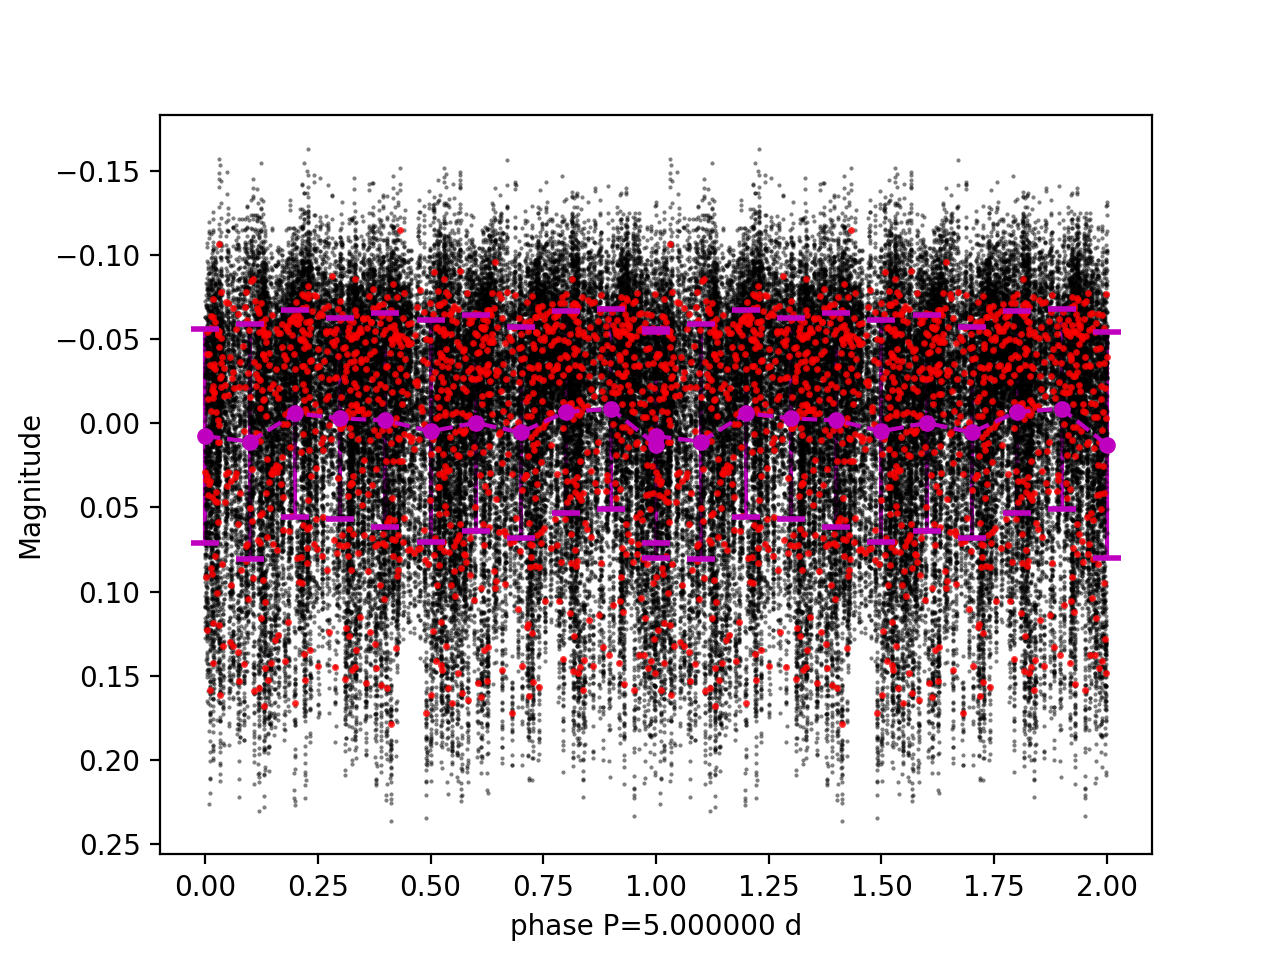

In [11]:
#You can also take a look at simbad for any given star
data.phasephold(period = 5, num_bins=10, show_errors= True)

In [ ]:
#You can also take a look at simbad for any given star
star.simbad

In [ ]:
#get the star type from simbad and spectral type
star.simbad['OTYPE'].value[0],star.simbad['SP_TYPE'].value[0]

In [2]:
#Resulting RMS for a star
data.rms

NameError: name 'data' is not defined

In [ ]:
#Point-to-point scatter
data.ptp_scatter

In [ ]:
#Noise, as computed by the last n points for the periodogram
data.noise(100)

In [ ]:
#Number of datapoints for any given star
data.datapoints

In [ ]:
#You can also easily get the raw data (time,flux, flux_err)
data.raw_data

In [ ]:
data.path

In [ ]:
data

In [ ]:
# You may also want to just create a data object from a path.
# For this you can access the configuration directly (recommended)

config_dict = get_config()
config_dict

In [ ]:
path = os.path.join(config_dict['Decorrelation Path'],'Decorrelations/Field 9/HD_143275/02-06-21_GD/RESULTS/HD143275_09-Sco-I-2015_BAb_2_3_A.ndat')
path

In [ ]:
data = Data(path,None)

In [ ]:
data.scatter()

In [ ]:
data.to_periodogram().plot()